In [1]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import matplotlib.pyplot as plt #for tight_layout()
import pylab as pyl #for generating plots: show()
import statsmodels.api as sm  #to use the Logit()
from sklearn import preprocessing
import pylab as pyl #for generating plots: show()

In [2]:
# importando o dataset
mydata = pd.read_csv('dataset/data-set-clube-new-v2.csv', sep=';')

In [3]:
# tamanho do dataset
print(mydata.shape) 

(3027, 6)


In [4]:
mydata.head(5) 

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,38810,CANCELADO,24,0,0,0
1,54088,CANCELADO,0,0,0,0
2,31324,CANCELADO,12,1,2,4
3,34368,CANCELADO,9,1,2,0
4,27004,CANCELADO,14,1,0,7


In [5]:
#  retirando a coluna id_socio, não será necessária agora.

mydata = mydata.drop(['id_socio'], axis=1)

In [6]:
# resumindo os dados
print(mydata.describe())

       qtde_em_aberto  qtde_em_dia  qtde_em_atraso  qtde_frequencia_ano
count     3027.000000  3027.000000     3027.000000          3027.000000
mean        10.601255     4.386852        3.212752            16.846383
std         10.743290     7.017163        5.761192            42.621343
min          0.000000     0.000000        0.000000             0.000000
25%          0.000000     0.000000        0.000000             0.000000
50%         10.000000     0.000000        0.000000             0.000000
75%         24.000000     6.000000        4.000000            12.000000
max         55.000000    53.000000       39.000000           490.000000


In [7]:
# desvio padrão de cada coluna
mydata.std()

qtde_em_aberto         10.743290
qtde_em_dia             7.017163
qtde_em_atraso          5.761192
qtde_frequencia_ano    42.621343
dtype: float64

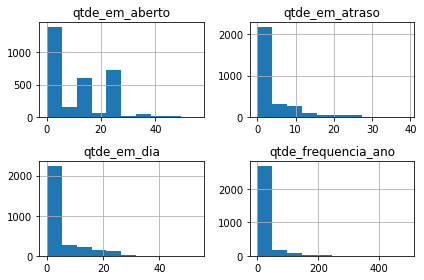

In [8]:
# histogramas de plotagem de todas as colunas
mydata.hist()


plt.tight_layout() # tight_layout(): ajustando o espaçamento entre subparcelas para minimizar as sobreposições.
pyl.show()         

In [9]:
# criando explicitamente um espaço reservado para interceptação em y: b0
mydata['int']=1
mydata.head()

,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano,int
0,CANCELADO,24,0,0,0,1
1,CANCELADO,0,0,0,0,1
2,CANCELADO,12,1,2,4,1
3,CANCELADO,9,1,2,0,1
4,CANCELADO,14,1,0,7,1


In [11]:
# Passando os todas as colunas para o tipo inteiro

label_encoder = preprocessing.LabelEncoder()

mydata['status'] = label_encoder.fit_transform(mydata['status'])
mydata['qtde_em_aberto'] = label_encoder.fit_transform(mydata['qtde_em_aberto'])
mydata['qtde_em_dia'] = label_encoder.fit_transform(mydata['qtde_em_dia'])
mydata['qtde_em_atraso'] = label_encoder.fit_transform(mydata['qtde_em_atraso'])

print (mydata.dtypes)

status                 int64
qtde_em_aberto         int64
qtde_em_dia            int64
qtde_em_atraso         int64
qtde_frequencia_ano    int64
int                    int64
dtype: object


In [13]:
# declarando as variáveis independentes, incluindo a interceptação
# criando o Modelo Logistic Regression
# ajustanto o modelo

independentVar= ['qtde_em_aberto','qtde_em_dia','qtde_em_atraso','qtde_frequencia_ano','int']
model1= sm.Logit(mydata['status'], mydata[independentVar])
answer= model1.fit()

Optimization terminated successfully.
         Current function value: 0.416349
         Iterations 8


In [14]:
# Detalhes do modelo
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                 3027
Model:                          Logit   Df Residuals:                     3022
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Nov 2019   Pseudo R-squ.:                  0.2663
Time:                        14:23:37   Log-Likelihood:                -1260.3
converged:                       True   LL-Null:                       -1717.7
Covariance Type:            nonrobust   LLR p-value:                1.060e-196
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
qtde_em_aberto          0.1079      0.006     19.500      0.000       0.097       0.119
qtde_em_dia            -0.0087      0.012     -0.704      0.481      -0.033       0.016
qtde_em_atraso         -0.0551      0.013     -4.270      0.000      -0.080      -0.030
qtde_frequencia_ano    -0.0220      0.004     -5.628      0.000      -0.030      -0.014
int                    -2.1943      0.112    -19.663      0.000      -2.413      -1.976
=======================================================================================
"""

In [15]:
# extraindo os coeficientes do resumo acima
answer.params

qtde_em_aberto         0.107875
qtde_em_dia           -0.008742
qtde_em_atraso        -0.055066
qtde_frequencia_ano   -0.021964
int                   -2.194313
dtype: float64

In [22]:
# define uma função 'y' que resolve
# y = b0 + b1 * id_socio + + b2 * qtde_em_aberto + b3 * qtde_em_dia + b4 * qtde_em_atraso + b5 * qtde_frequencia_ano;

# onde os índices do coeficiente de answer.params para usar na função acima são:
# id_socio               0.000522
# qtde_em_aberto         0.115094
# qtde_em_dia           -0.004706
# qtde_em_atraso        -0.055976
# qtde_frequencia_ano   -0.021123
# int                   -3.144639

coeffs=answer.params
def y(int, qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano):
    return coeffs[4]+ coeffs[0]*qtde_em_aberto + coeffs[1]*qtde_em_dia + coeffs[2]*qtde_em_atraso + coeffs[3]*qtde_frequencia_ano

In [23]:
# teste para um sócio com os valores qtde_em_aberto, qtde_em_dia, qtde_em_atraso, qtde_frequencia_ano
# X,20,10,5,60 resp.
y1= y(int,20,10,5,60)
print(y1)

-1.7173936354366661


In [24]:
# above, y1= 3.535 is the log-odds of having diabetes to that of not having diabetes
# Thus, to convert y1 into a probability 'p', plug in the exponent of y1 into the formula e^y1 / (1 + e^y1)

np.exp(1) #checking the working of exp()

2.718281828459045

In [25]:
p= np.exp(y1)/ (1+ np.exp(y1)) #formula e^y1 / (1 + e^y1)
print(p)

0.15220718456576918
